In [1]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Math
import math

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

# For evaluating our ML results
from sklearn import metrics

# Dataset Import
import statsmodels.api as sm

In [2]:
df = sm.datasets.fair.load_pandas().data

In [3]:
df.head()

rate_marriage  age  yrs_married  children  religious  educ  occupation  \
0              3   32          9.0         3          3    17           2   
1              3   27         13.0         3          1    14           3   
2              4   22          2.5         0          1    16           3   
3              4   37         16.5         4          3    16           5   
4              5   27          9.0         1          1    14           3   

   occupation_husb   affairs  
0                5  0.111111  
1                4  3.230769  
2                5  1.400000  
3                5  0.727273  
4                4  4.666666

In [4]:
def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0

In [5]:
df['Had_Affair'] = df['affairs'].apply(affair_check)

In [6]:
df

rate_marriage   age  yrs_married  children  religious  educ  occupation  \
0                 3  32.0          9.0       3.0          3    17           2   
1                 3  27.0         13.0       3.0          1    14           3   
2                 4  22.0          2.5       0.0          1    16           3   
3                 4  37.0         16.5       4.0          3    16           5   
4                 5  27.0          9.0       1.0          1    14           3   
5                 4  27.0          9.0       0.0          2    14           3   
6                 5  37.0         23.0       5.5          2    12           5   
7                 5  37.0         23.0       5.5          2    12           2   
8                 3  22.0          2.5       0.0          2    12           3   
9                 3  27.0          6.0       0.0          1    16           3   
10                2  27.0          6.0       2.0          1    16           3   
11                5  27.0          6.0       2.0          3    14           3   
12                3  37.0         16.5       5.5          1    12           2   
13                5  27.0          6.0       0.0          2    14           3   
14                4  22.0          6.0       1.0          1    14           4   
15                4  37.0          9.0       2.0          2    14           3   
16                4  27.0          6.0       1.0          1    12           3   
17                1  37.0         23.0       5.5          4    14           5   
18                2  42.0         23.0       2.0          2    20           4   
19                4  37.0          6.0       0.0          2    16           5   
20                5  22.0          2.5       0.0          2    14           3   
21                3  37.0         16.5       5.5          2     9           3   
22                3  42.0         23.0       5.5          3    12           5   
23                2  27.0          9.0       2.0          4    20           3   
24                4  27.0          6.0       1.0          2    12           5   
25                5  27.0          2.5       0.0          3    16           4   
26                2  27.0          6.0       2.0          2    12           2   
27                5  37.0         13.0       1.0          3    12           3   
28                2  32.0         16.5       2.0          2    12           4   
29                3  27.0          6.0       1.0          1    14           3   
...             ...   ...          ...       ...        ...   ...         ...   
6336              5  42.0         23.0       4.0          3    14           5   
6337              5  27.0          6.0       0.0          4    14           4   
6338              5  42.0         23.0       2.0          3    12           2   
6339              4  32.0         13.0       3.0          3    16           4   
6340              5  27.0         13.0       3.0          3    16           4   
6341              5  27.0          9.0       1.0          2    14           4   
6342              4  22.0          2.5       0.0          2    16           4   
6343              5  17.5          2.5       0.0          4    12           3   
6344              4  32.0         16.5       2.0          2    12           3   
6345              5  27.0          9.0       1.0          3    12           3   
6346              4  22.0          2.5       0.0          4    14           4   
6347              5  22.0          2.5       1.0          2    12           3   
6348              5  27.0          0.5       0.0          4    20           4   
6349              5  37.0         16.5       3.0          3    14           5   
6350              5  32.0         13.0       2.0          4    14           3   
6351              4  22.0          0.5       0.0          2    16           3   
6352              5  42.0         23.0       2.0          4    12           3   
6353              5  22.0          2.

In [7]:
df.groupby('Had_Affair').mean()

rate_marriage        age  yrs_married  children  religious  \
Had_Affair                                                               
0                4.329701  28.390679     7.989335  1.238813   2.504521   
1                3.647345  30.537019    11.152460  1.728933   2.261568   

                 educ  occupation  occupation_husb   affairs  
Had_Affair                                                    
0           14.322977    3.405286         3.833758  0.000000  
1           13.972236    3.463712         3.884559  2.187243

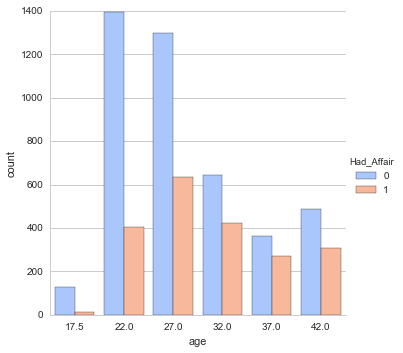

In [8]:
sns.factorplot('age',data=df,hue='Had_Affair',palette='coolwarm')

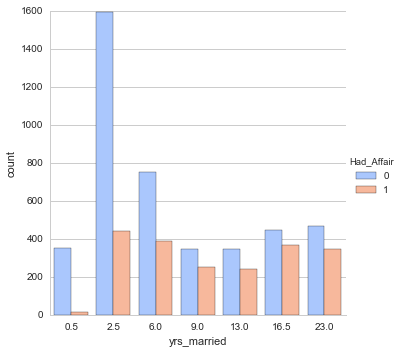

In [9]:
sns.factorplot('yrs_married',data=df,hue='Had_Affair',palette='coolwarm')

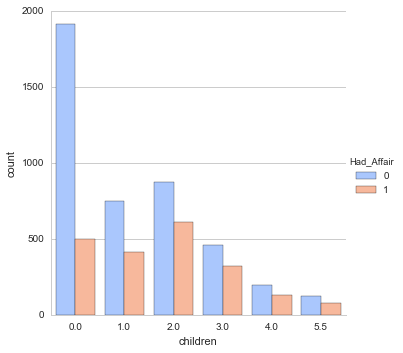

In [10]:
sns.factorplot('children',data=df,hue='Had_Affair',palette='coolwarm')

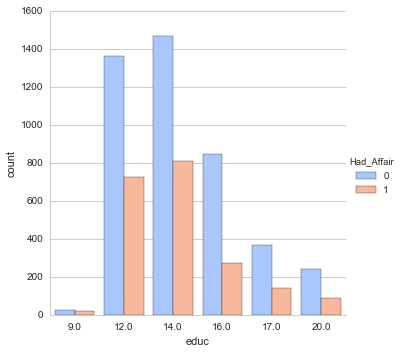

In [11]:
sns.factorplot('educ',data=df,hue='Had_Affair',palette='coolwarm')

In [12]:
occ_dummies = pd.get_dummies(df['occupation'])

In [13]:
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

In [14]:
occ_dummies.head()

1  2  3  4  5  6
0  0  1  0  0  0  0
1  0  0  1  0  0  0
2  0  0  1  0  0  0
3  0  0  0  0  1  0
4  0  0  1  0  0  0

In [16]:
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']

In [17]:
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [18]:
X = df.drop(['occupation','occupation_husb','Had_Affair'],axis=1)

In [19]:
dummies = pd.concat([occ_dummies,hus_occ_dummies],axis=1)

In [22]:
X = pd.concat([X,dummies],axis=1)

In [23]:
X.head()

rate_marriage  age  yrs_married  children  religious  educ   affairs  occ1  \
0              3   32          9.0         3          3    17  0.111111     0   
1              3   27         13.0         3          1    14  3.230769     0   
2              4   22          2.5         0          1    16  1.400000     0   
3              4   37         16.5         4          3    16  0.727273     0   
4              5   27          9.0         1          1    14  4.666666     0   

   occ2  occ3  occ4  occ5  occ6  hocc1  hocc2  hocc3  hocc4  hocc5  hocc6  
0     1     0     0     0     0      0      0      0      0      1      0  
1     0     1     0     0     0      0      0      0      1      0      0  
2     0     1     0     0     0      0      0      0      0      1      0  
3     0     0     0     1     0      0      0      0      0      1      0  
4     0     1     0     0     0      0      0      0      1      0      0

In [25]:
Y = df.Had_Affair

Y.tail()

6361    0
6362    0
6363    0
6364    0
6365    0
Name: Had_Affair, dtype: int64

In [30]:
X = X.drop('affairs',axis=1)

In [31]:
X.head()

rate_marriage  age  yrs_married  children  religious  educ  occ2  occ3  \
0              3   32          9.0         3          3    17     1     0   
1              3   27         13.0         3          1    14     0     1   
2              4   22          2.5         0          1    16     0     1   
3              4   37         16.5         4          3    16     0     0   
4              5   27          9.0         1          1    14     0     1   

   occ4  occ5  occ6  hocc2  hocc3  hocc4  hocc5  hocc6  
0     0     0     0      0      0      0      1      0  
1     0     0     0      0      0      1      0      0  
2     0     0     0      0      0      0      1      0  
3     0     1     0      0      0      0      1      0  
4     0     0     0      0      0      1      0      0

In [32]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

In [33]:
Y = np.ravel(Y)

Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [34]:
log_model = LogisticRegression()

log_model.fit(X,Y)

log_model.score(X,Y)

0.72588752748978946

In [36]:
Y.mean()

0.32249450204209867

In [37]:
coeff_df = DataFrame(zip(X.columns,np.transpose(log_model.coef_)))

In [38]:
coeff_df

0                   1
0   rate_marriage    [-0.69751024616]
1             age  [-0.0561916647628]
2     yrs_married     [0.10377681236]
3        children   [0.0182911397779]
4       religious    [-0.36832290498]
5            educ  [0.00890195753587]
6            occ2    [0.296111837283]
7            occ3    [0.606052332054]
8            occ4    [0.343259482442]
9            occ5     [0.94006396288]
10           occ6    [0.919085673732]
11          hocc2    [0.219634563784]
12          hocc3    [0.323455986054]
13          hocc4    [0.189038509875]
14          hocc5    [0.212503714395]
15          hocc6    [0.212868942457]

In [39]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [40]:
log_model2 = LogisticRegression()

log_model2.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [41]:
class_predict = log_model2.predict(X_test)

In [42]:
print metrics.accuracy_score(Y_test,class_predict)

0.722361809045
